In [1]:
!pip install Minisom

  Created wheel for Minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=f8d9d529dc6552464af08dc6f25944cbb4e927d59d238b474a0f4e1ceaaf1aec
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built Minisom


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#dataset : http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning A-Z (Codes and Datasets)/Part 12 - Self Organizing Map/Credit_Card_Applications.csv')

In [4]:
df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [5]:
#usupervised learning, y is not used
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

print(X.shape)

(690, 15)


In [6]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))

X = sc.fit_transform(X) 

In [7]:
from minisom import MiniSom

som = MiniSom(x=10, y=10, input_len= 15, sigma =1.0, learning_rate=0.5)

In [8]:
som.random_weights_init(X)

som.train_random(X, num_iteration=100)

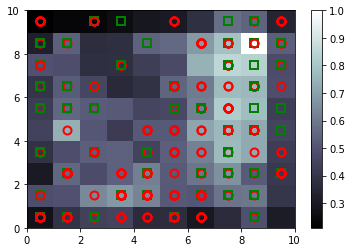

In [9]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 8,
         markeredgewidth = 2)
show()

In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
3892264788982
3891021638020
3891712388434
3892255549009
3892615658227
3892337460121
3892089978682
3892273779226
3890689248721
3892607916628
3891260628673
3891559304557
3890474232052
3892411379905
3893260957963
3891723376510
3892335212560
3893176050103
3892550978416
3890884786528
3891217925014
3890937978805
3891680423122
3892795962565
3892652118661
3893004486280
3896707717621
3896678249599
3896920736458
3896819346484
3897027370741
3896835828598
